<a href="https://colab.research.google.com/github/valenciajaime/GCoupling_v0/blob/master/Copy_of_GCoupling_Rev2022_marz_15_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PORTADA (Gtierras)

Programa Coupling

Calculo de Sistemas de puesta a tierra.


Lenovo: Software_Coupling_2021

[Drive Lenovo2021](https://drive.google.com/drive/folders/1y0d43kUrNVy9bWUVxU9Z5Bi2i0MpA1er?usp=sharing) Descargar modulo

[Paper Otero 1999](https://drive.google.com/file/d/1txaW0pMyonRAgEmT0E7t639PHU6dG-Eb/view?usp=sharing)

[Presentacion Coupling_Mod_GT07](https://docs.google.com/presentation/d/1N7nQ4oziwy3Nz3X21yOdRVkTiQkco0m-/edit?usp=sharing&ouid=115596684584813514481&rtpof=true&sd=true)


Autores: German Moreno, Carlos Cardenas, Hector D, Gomez, Walter M. Villa, Jaime A. Valencia.


Fecha: 2022-marz-15 martes


Modulos que se deben cargar:

Modulo_GT07.py (Modulo actualizado a marzo 2022)

Datos de onda 0.5/20 tomada de Gcoupling y de Gtierras:

Onda_GC01.txt, Onda_HD01.txt, delta_t=1e-7

Onda_GC02.txt, Onda_HD02.txt, delta_t=1.15e-8

# Descripcion

**Objetivo:**

Simulacion del caso de contrapeso horizontal de Grecv con datos de la onda de Hector David.

Comparacion con resultados de Gtierras.



[libro Capitulo 4](https://docs.google.com/document/d/1lzkIKQoMII6ABE0-Utjo9XODYbw3BLHS/edit)

# Importacion de modulos

In [ ]:
#importaciones
import os 
import numpy as np # entorno similar a Matlab
import matplotlib.pyplot as plt 
import matplotlib #ayuda matplotlib galery

#caso 
from scipy import optimize as OP
from scipy import integrate as IT
from Modulo_GT07 import *



# Caso: horizontal m

In [ ]:
help(SPT_01)

Calculo electrodo horizontal de 15 m a 0.6 m de profundidad, sin impedancia interna. Caso base con permitividad electrica constante.


Figura 6.Grecv1996

[Paper](https://drive.google.com/file/d/1sDnKFK39udVgelYi3d9j9y4vQoFQxrhM/view)


*   Radio conductor 16 mm
*   ro = 50 ohms-m
*   eo = 15 




In [ ]:
### CODIGO PPAL############Tiempo ejecucion: 2m 25s
## Electrodo vertical
# Clase SPT_01()
# SPT_01(freq, ro=100, er=15, Kp=0, seg_i=4, K_zi=0, K_fr=0)
#        freq: frecuencia en Hz
#        ro: resistividad de tierra en ohms-m
#        er: permitividad electrica relativa
#        Kp: constante de propagacion
#        seg_i: segmentos de integracion numerica
#        K_zi: 0 sin calculo de impedancia conductor
#              1 con calculo de impedancia conductor
#        K_fr: 0 parametros no dependientes de la frecuencia

S1 = SPT_01(60, ro=70.0, er=15, Kp=0, seg_i=50, K_zi=0)#Parametros SPT

##Datos conductores STP
ps=30 # particion 0- minima posible,  1 maxima posible, Mayor 1==numero segmentos

#Formato de datos conductor
#Ad = [Pi_x, Pi_y, Pi_z, Pf_x, Pf_y, Pf_z, Radio, conductancia]
Conductancia = 4545454.54

####ediciones conductores
Ad1 = [0,0,0.6,0,15,0.6,0.012, Conductancia]#conductor 1

#####  fin edicion
print("Datos leidos: \n",Ad1) #formato: Pi(x,y,z), Pf(x,y,z), Radio; conductividad

S1.Add_conduct([Ad1],ps) #funcion para adicionar conductores

print("\nClase Sistema de Puesta a Tierra: \n",S1)


Datos leidos: 
 [0, 0, 0.6, 0, 15, 0.6, 0.012, 4545454.54]

Clase Sistema de Puesta a Tierra: 
 Instancia clase SPT_01
Archivo datos: Ninguno
Total Conductores: 1
Numero Nodos: 31
Numero Ramas: 30


(0.0, 0.0, 0.6)


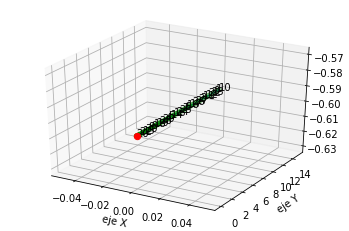

In [ ]:
##visualiza nodos en conductor

#print("Numero de nodos: ",len(S1.L_nodos))

#obtener nodo origen
#for i,q in enumerate(S1.L_nodos):
#  nnn = int(q[0])
#  pro = nnn==0 or nnn==10 or nnn==20 or nnn==30 or nnn==40 or nnn==50 or nnn==60 or nnn==70
#  if pro and q[1]==0 and q[2]==0.5:
#    print("Nodo numero: ",i," Coord: ",q)
    

#N_ver = int(input("Nodo a ver: "))
#for q,i in enumerate(S1.L_nodos):
#  print(q,i)
# 20 (0.0, 0.0, 0.6)
print(S1.L_nodos[20])
Nodo_Ic = 20
S1.Show_nodos(Nodo_Ic)

# Calculo Zt (Solve_SPT01)

In [ ]:
#se define la clase solucion con argumento el sistema
# de puesta a tierra S1
S_S1 = Solve_SPT01(S1)#clase solucion sistema puesta a tierra
print("Objeto S_S1: ",S_S1)

#calculo de impedancia de tierra una sola frecuencia
S_S1.Selec_cur(20)#nodo de aplicacion de corriente
print("Frecuencia de calculo: ",S_S1.spt.freq)
print("Impedancia Tierra: ",round(S_S1.Zt_1f,5))

Objeto S_S1:  Clase solucion SPT
Z_tierra:  6.72284105348847
Frecuencia de calculo:  60
Impedancia Tierra:  6.72284


# Grafico Magnitud Zt(f)

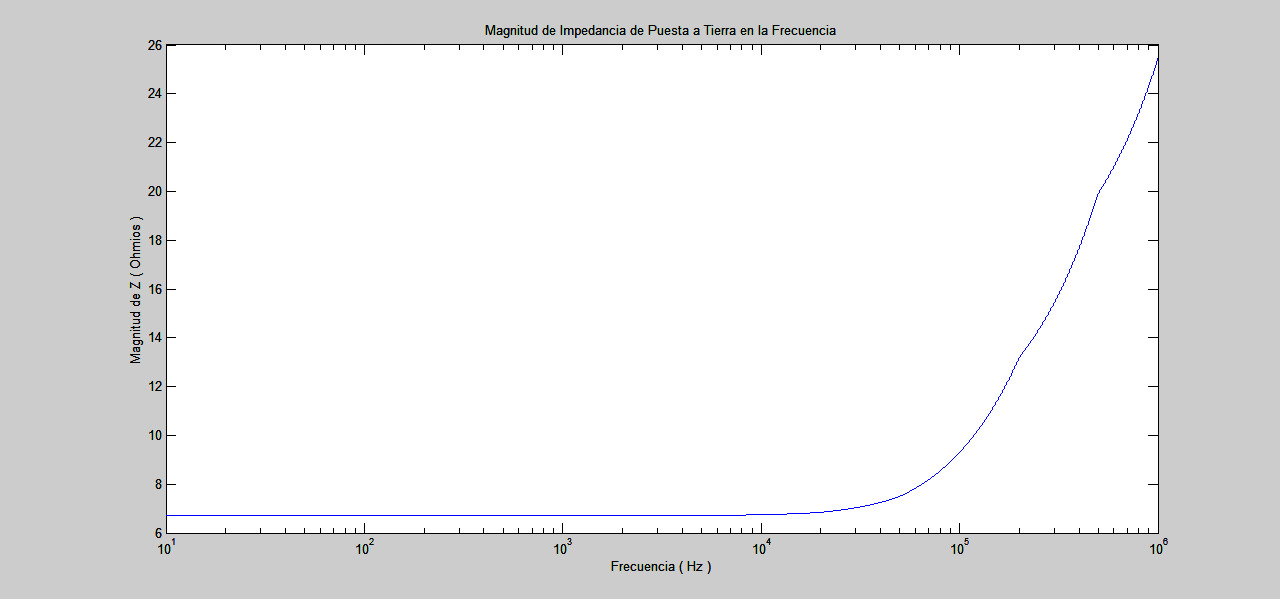Pendiente comparar con Gtierras ??

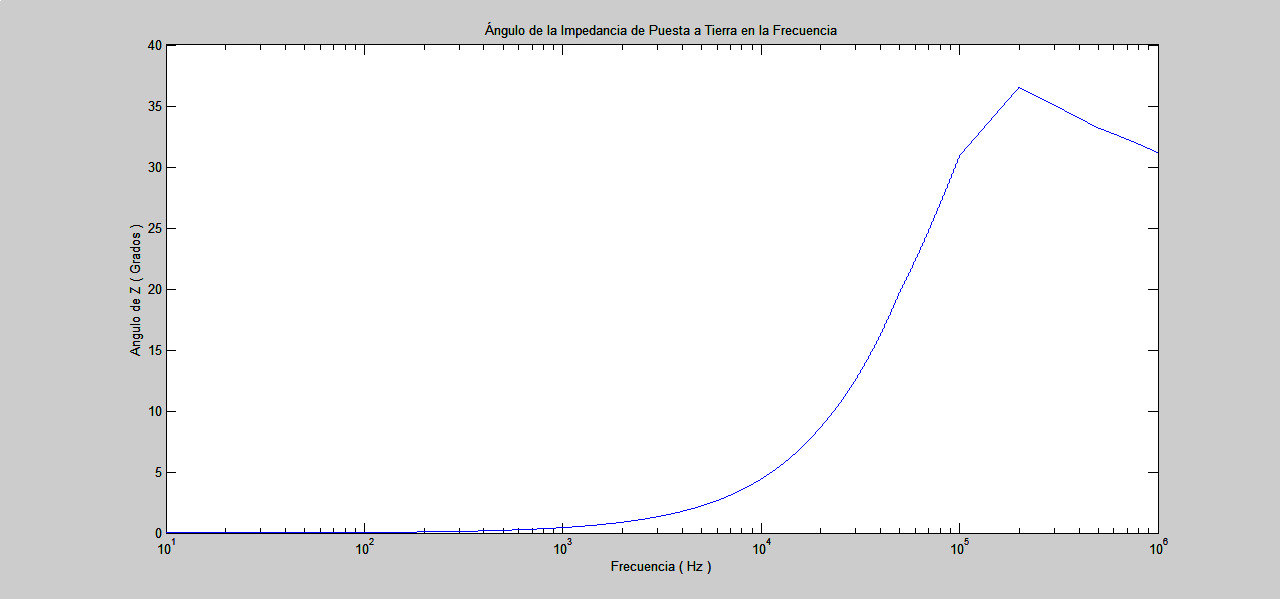

Graficos de Gtierrs suministrados por Hector David el 11 de marzo del 2022.

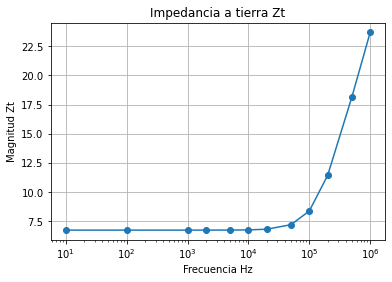

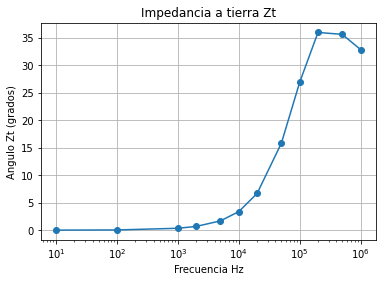

In [ ]:
#Calculo impedancia a tierra un vector
# se programa metodO en clase Solve_SPT
#def Show_Zt_Freq(self):

S_S1.Selec_cur1([1,1,1,1,1,1,1,1,1,1,1,1],[1e1,1e2,1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5,5e5,1e6],Nodo_Ic)
S_S1.Show_Zt_Freq()

In [ ]:
##Tabla de valores
print("==Freq===!=======Zt=======!====mag Zt=====")
for i,qz in enumerate(S_S1.HHz):
  
  s = "{:8.0f} !  {:7.4f} !   {:7.3f} !".format(qz,S_S1.ZZ[i],abs(S_S1.ZZ[i]))
  print(s)



==Freq===!=======Zt=======!====mag Zt=====
      10 !  6.7228+0.0004j !     6.723 !
     100 !  6.7228+0.0040j !     6.723 !
    1000 !  6.7229+0.0396j !     6.723 !
    2000 !  6.7232+0.0792j !     6.724 !
    5000 !  6.7248+0.1979j !     6.728 !
   10000 !  6.7307+0.3956j !     6.742 !
   20000 !  6.7541+0.7901j !     6.800 !
   50000 !  6.9157+1.9556j !     7.187 !
  100000 !  7.4606+3.7784j !     8.363 !
  200000 !  9.2405+6.6986j !    11.413 !
  500000 !  14.7463+10.5538j !    18.134 !
 1000000 !  19.9068+12.8465j !    23.692 !


# Lectura señal

Se requiere extrapolar la señal para tener una ventana de 3 milisegundos y la señal debe caer al 50% en 20 microsegundos.

Clase My_signal01


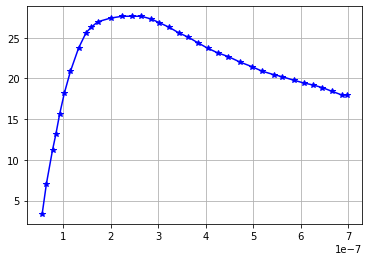

In [ ]:
#Señales digitalizadas del paper de Grecv
# voltaje simulado tomado de la figura 6
signal01 = My_signal01()
signal01.Get_fromFile2c("/content/Grecv_Fig6_Vsimulado_0m.csv")
signal01.Show_Datos()

Clase My_signal01


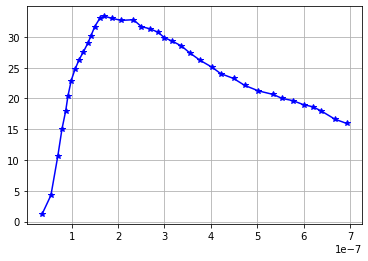

In [ ]:
# voltaje medido tomado de la figura 6
signal02 = My_signal01()
signal02.Get_fromFile2c("/content/Grecv_Fig6_Vmedida_0m.csv")
signal02.Show_Datos()

Numero de Muestras:  (260870, 2)
Atributos: T_onda, V_onda


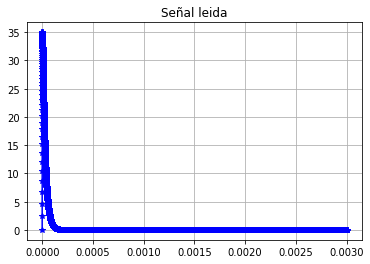

Tiempo final:  0.0029999935


In [ ]:
#señal de corriente de inyeccion
#tomado del paper de Grecv fig.6
S_S1.Read_signal01("/content/Onda_HD02.txt")
print("Tiempo final: ",S_S1.T_onda[-1])

# Respuesta en el tiempo

Nodo inyeccion I:  20
Nodo Observacion V:  20


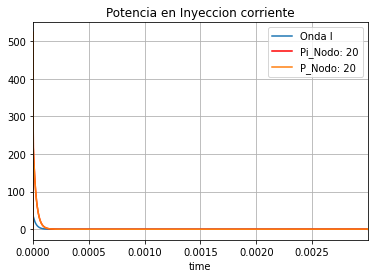

In [ ]:
S_S1.Get_Vtime(Nodo_Ic,[Nodo_Ic],t_sup= S_S1.T_onda[-1]) 
#Nodo 4: 0 mts 

#Datos Nodo inyeccion y nodos observacion 
#S_S1.V_t
#S_S1.Vver_t

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


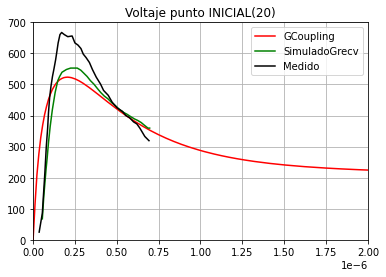

In [ ]:
##Grafico de comparacion de resultados
plt.plot(S_S1.T_onda,S_S1.V_t,"r")
plt.plot(signal01.Time,20*signal01.Valores,"g")
plt.plot(signal02.Time,20*signal02.Valores,"k")
plt.legend(["GCoupling","SimuladoGrecv","Medido"])
plt.grid("on")
plt.ylim(0,700)
plt.xlim(0,0.2e-5)
plt.title("Voltaje punto INICIAL("+str(Nodo_Ic)+")")
plt.show()


Clase My_signal01


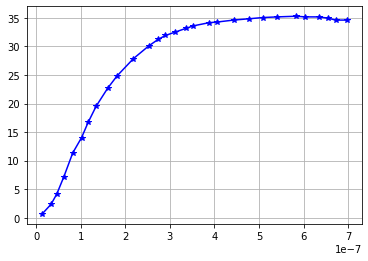

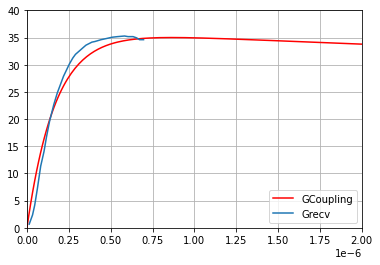

In [ ]:
##Comparacion señal de Grecv y señal usada en esta simulacion
signal03 = My_signal01()
signal03.Get_fromFile2c("/content/Grecv_Fig6_Corriente.csv")
signal03.Show_Datos()

plt.plot(S_S1.T_onda,S_S1.V_onda,"r")
plt.plot(signal03.Time, signal03.Valores)
plt.legend(["GCoupling","Grecv"])
plt.grid("on")
plt.ylim(0, 40)
plt.xlim(0,0.2e-5)
plt.show()

Nodo inyeccion I:  20
Z_impulso inyeccion:  172307.61
Nodo Observacion V:  20
Z_impulso inyeccion:  172307.61


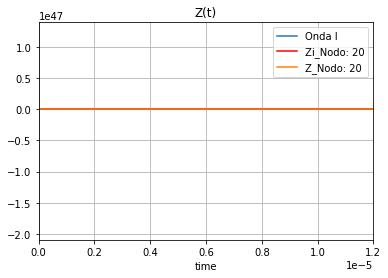

In [ ]:
###Esta funcion esta dudosa?????????
S_S1.Get_Ztime(Nodo_Ic,[Nodo_Ic]) 

# Resultados y conclusiones

**Resultados y analisis:**

GCoupling esta atenuando el sobre impulso usando impedancia interna y sin impedancia interna.







**Conclusiones:**




**Referencias:**